<a href="https://colab.research.google.com/github/shahzaibkhanniazi-dot/Smart_Crop_Recommendation_System/blob/main/Week1_Data_Preprocessing_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Note: Once it says "Mounted at /content/drive", you are ready!

Mounted at /content/drive


In [3]:
# Cell 2: Loading the Dataset
import pandas as pd

file_path = '/content/drive/MyDrive/MSAI_Crop_Project/Crop_recommendation.csv'

#For Reading the CSV file
df = pd.read_csv(file_path)

# Showing the first 5 rows to confirm it worked
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


--- Data Statistics ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


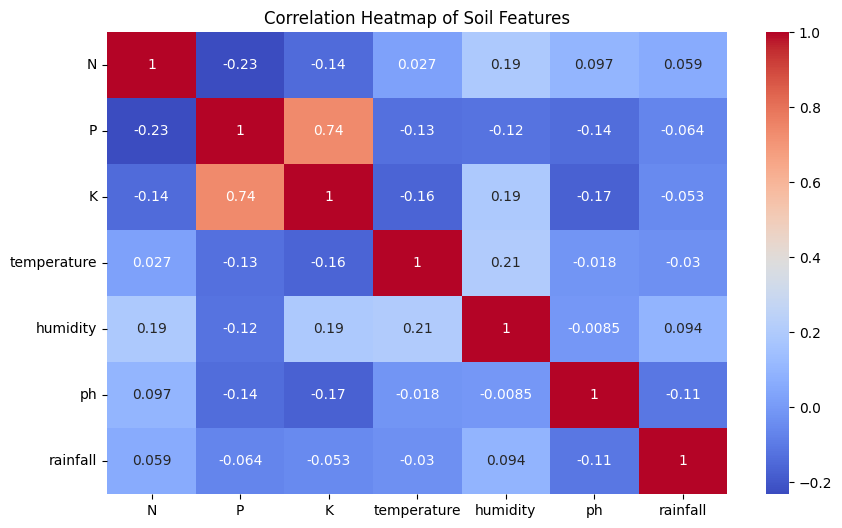

In [4]:
# Cell 3: Data Visualization (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking statistics
print("--- Data Statistics ---")
print(df.describe())

# 2. Creating a Correlation Matrix (Only for numeric columns)
# This shows how features like Rainfall and Humidity are related
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Soil Features")
plt.show()

In [5]:
# Cell 4: Splitting Data for Training and Testing
from sklearn.model_selection import train_test_split

# Defining Features (X) and Target (y)
X = df.drop('label', axis=1)  # The input numbers (N, P, K, etc.)
y = df['label']               # The answer (Rice, Maize, etc.)

# Splitting: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Verifying the split worked
print("\nFirst 3 rows of Training Data:")
display(X_train.head(3))

Training Data Shape: (1760, 7)
Testing Data Shape: (440, 7)

First 3 rows of Training Data:


,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411


## Baseline Approach Strategy
1. **Goal:** Predict the best crop with >90% accuracy.
2. **Baseline Model:** I will use a simple Decision Tree Classifier as my baseline because it works well with tabular data and is easy to interpret.
3. **Evaluation Metric:** I will use "Accuracy Score" and "Confusion Matrix" to measure success.

# Week 2: Model Development

In [6]:
# Week 2: Model Development

import joblib  # This library saves the model to a file
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the Model with a "Magic Lock"
# random_state=42 ensures the tree splits exactly the same way every time.
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

# 2. Train the Model
print("Training the model...")
dt_model.fit(X_train, y_train)
print("Training Completed!")

# 3. Test the Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# 4. SAVE THE MODEL (The Permanent Fix)
# We save the trained model to a file named 'crop_recommendation_model.pkl'
joblib.dump(dt_model, 'crop_recommendation_model.pkl')
print("\n💾 Model Saved! You can now download 'crop_recommendation_model.pkl' to your computer.")

# 5. Verify it works
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Training the model...
Training Completed!

✅ Model Accuracy: 97.95%

💾 Model Saved! You can now download 'crop_recommendation_model.pkl' to your computer.

--- Classification Report ---
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
   

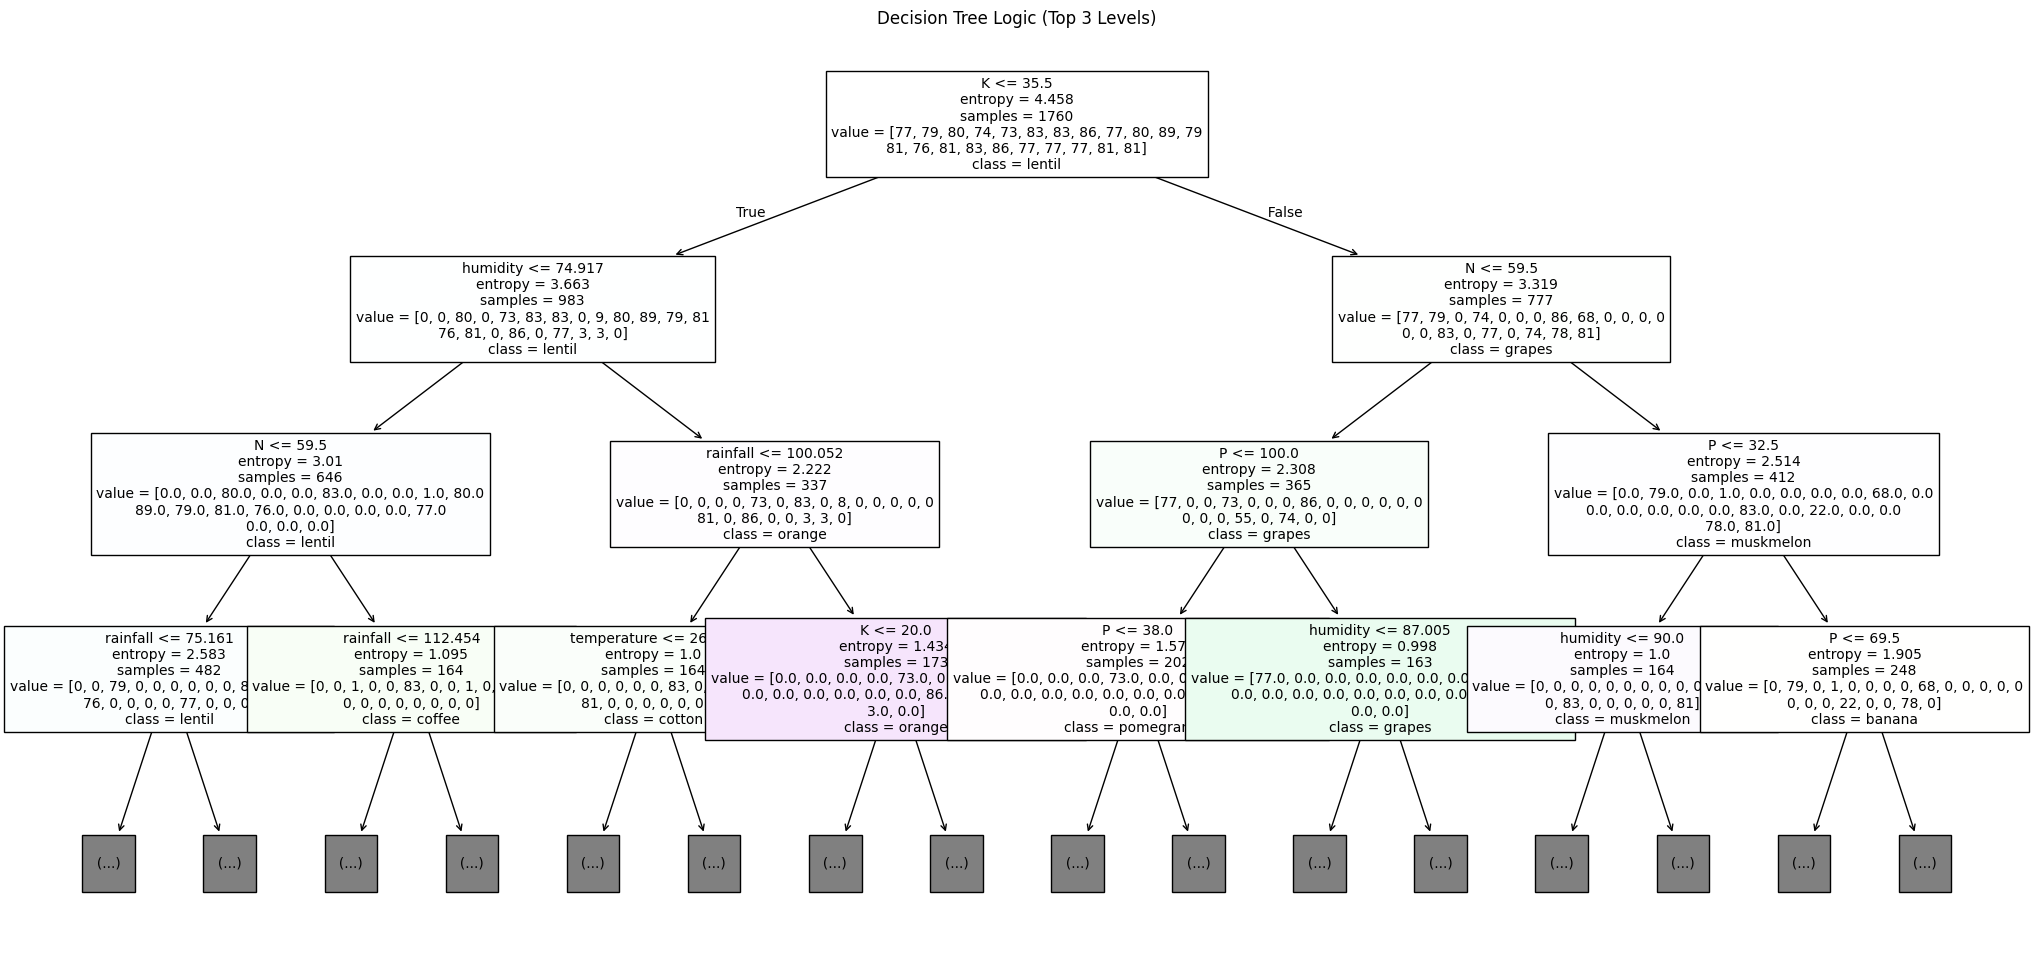

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Increase figure size significantly
plt.figure(figsize=(25, 12))

plot_tree(dt_model,
          feature_names=X.columns,
          class_names=dt_model.classes_,
          filled=True,
          fontsize=10,
          max_depth=3) # <--- THIS IS THE KEY FIX

plt.title("Decision Tree Logic (Top 3 Levels)")
plt.savefig('decision_tree_visual_clean.png', dpi=300)
plt.show()

## Week 3: Prediction System & User Testing

In [9]:
import pandas as pd
import joblib

# Ensure the model is loaded (if not already)
try:
    loaded_model = joblib.load('crop_recommendation_model.pkl')
except:
    print("⚠️ Error: Make sure 'crop_recommendation_model.pkl' is uploaded or saved!")

def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Accepts soil and weather data and returns the recommended crop.
    Uses a DataFrame to prevent sklearn warnings.
    """
    # 1. Define the column names exactly as they were in the training data
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    # 2. Create a DataFrame instead of a Numpy array
    user_input = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=feature_names)

    # 3. Make prediction
    prediction = loaded_model.predict(user_input)

    return prediction[0]

# --- TEST THE NEW FUNCTION ---
print("\n--- Test Case A (Wet & Nitrogen Rich) ---")
pred_a = recommend_crop(90, 42, 43, 20, 82, 6, 200)
print(f"Prediction: {pred_a.upper()}")

print("\n--- Test Case B (Dry Conditions) ---")
pred_b = recommend_crop(20, 60, 55, 28, 40, 7, 40)
print(f"Prediction: {pred_b.upper()}")


--- Test Case A (Wet & Nitrogen Rich) ---
Prediction: RICE

--- Test Case B (Dry Conditions) ---
Prediction: CHICKPEA


In [10]:
# --- ADDITIONAL TEST CASES ---

# Test Case D: High Potassium & Phosphorus (Likely Kidney Beans or Grapes)
print("\n--- Test Case D (High P & K values) ---")
# High P (67) and K (77), Moderate Rain
pred_d = recommend_crop(N=20, P=67, K=77, temperature=23, humidity=60, ph=6, rainfall=100)
print(f"Farmer's Input: High P&K, Moderate Rain -> AI Recommends: 🍇/🫘 {pred_d.upper()}")

# Test Case E: High Rainfall + Hot + Humid (Tropical Climate)
print("\n--- Test Case E (Tropical Storm Conditions) ---")
# Very High Rain (250mm), High Humidity (92), Hot (27C)
pred_e = recommend_crop(N=50, P=40, K=30, temperature=27, humidity=92, ph=6.5, rainfall=250)
print(f"Farmer's Input: Heavy Rain, Hot & Humid -> AI Recommends: 🥥/☕ {pred_e.upper()}")


--- Test Case D (High P & K values) ---
Farmer's Input: High P&K, Moderate Rain -> AI Recommends: 🍇/🫘 PAPAYA

--- Test Case E (Tropical Storm Conditions) ---
Farmer's Input: Heavy Rain, Hot & Humid -> AI Recommends: 🥥/☕ COCONUT


In [11]:
# --- STRESS TESTING (CHALLENGING SCENARIOS) ---

# Test Case F: The "Cold & Mountainous" Test
# Very low temperature (12°C), but good rain.
# Expectation: Should be a cool-weather fruit like Grapes or Apple.
print("\n--- Test Case F (Cold/Mountainous) ---")
pred_f = recommend_crop(N=20, P=120, K=200, temperature=12, humidity=80, ph=6, rainfall=110)
print(f"Input: Cold (12°C), High P&K -> AI Recommends: 🍎/🍇 {pred_f.upper()}")

# Test Case G: The "Poor Soil" Test
# Almost NO nutrients (N/P/K are very low) and low rain.
# Expectation: Should be a hardy legume like Mothbeans or Kidneybeans that survives anywhere.
print("\n--- Test Case G (Nutrient Deficient & Dry) ---")
pred_g = recommend_crop(N=5, P=5, K=10, temperature=28, humidity=30, ph=5.5, rainfall=30)
print(f"Input: Poor Soil (N=5), Dry -> AI Recommends: 🫘 {pred_g.upper()}")

# Test Case H: The "Swamp" Test
# High Heat + 100% Humidity + Massive Rain.
# Expectation: Coconut or Papaya.
print("\n--- Test Case H (Tropical Swamp) ---")
pred_h = recommend_crop(N=30, P=20, K=30, temperature=35, humidity=99, ph=6.5, rainfall=280)
print(f"Input: 99% Humidity, 35°C -> AI Recommends: 🌴 {pred_h.upper()}")


--- Test Case F (Cold/Mountainous) ---
Input: Cold (12°C), High P&K -> AI Recommends: 🍎/🍇 GRAPES

--- Test Case G (Nutrient Deficient & Dry) ---
Input: Poor Soil (N=5), Dry -> AI Recommends: 🫘 MOTHBEANS

--- Test Case H (Tropical Swamp) ---
Input: 99% Humidity, 35°C -> AI Recommends: 🌴 COCONUT


--- Research-Grade Evaluation Metrics ---
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      

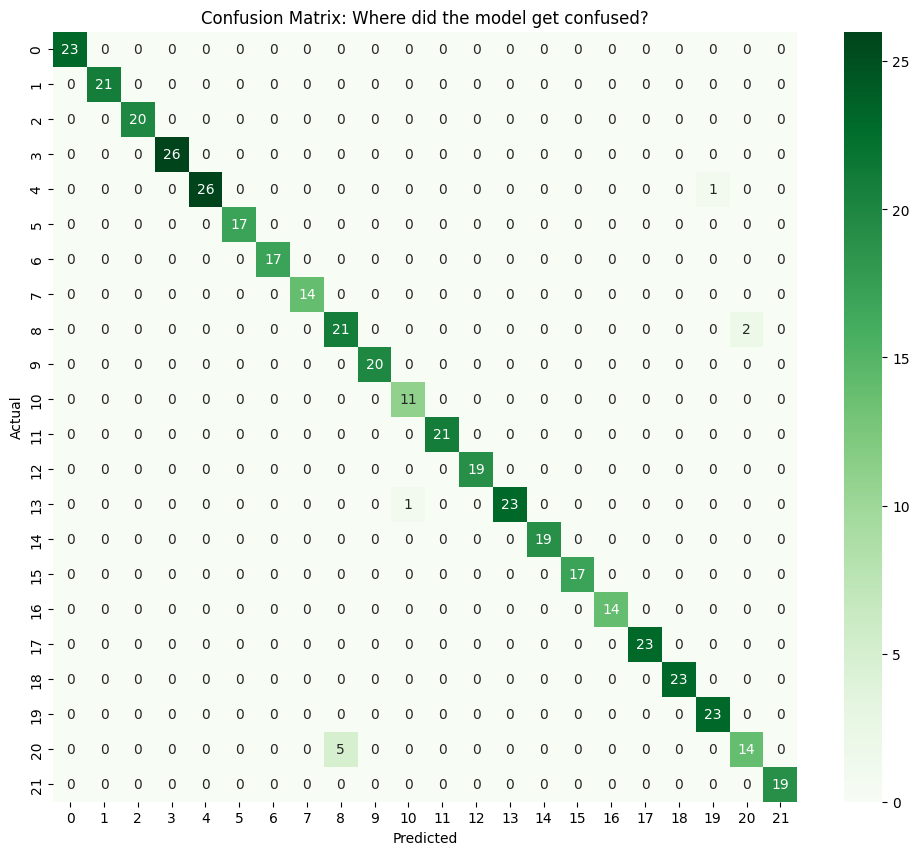

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the Test set
y_pred = dt_model.predict(X_test)

# 2. Print the Detailed Report (Precision, Recall, F1)
print("--- Research-Grade Evaluation Metrics ---")
print(classification_report(y_test, y_pred))

# 3. Visual Confusion Matrix (To show where the model makes mistakes)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Where did the model get confused?")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
plt.savefig('confusion_matrix.png')

<Figure size 640x480 with 0 Axes>

1. The Stability Test (K-Fold Cross-Validation)

In [14]:
from sklearn.model_selection import cross_val_score

# Run 5-Fold Cross Validation
# This trains the model 5 separate times on different subsets of data
print("--- 🔄 Running 5-Fold Cross-Validation ---")
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print(f"Individual Run Scores: {cv_scores}")
print(f"Average Research Accuracy: {cv_scores.mean() * 100:.2f}%")
print("------------------------------------------")
# If the Average is close to 98%, your model is scientifically valid.

--- 🔄 Running 5-Fold Cross-Validation ---
Individual Run Scores: [0.98863636 0.97272727 0.99318182 0.97954545 0.975     ]
Average Research Accuracy: 98.18%
------------------------------------------


2. The "Why" Test (Feature Importance Analysis)

/tmp/ipython-input-218104709.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


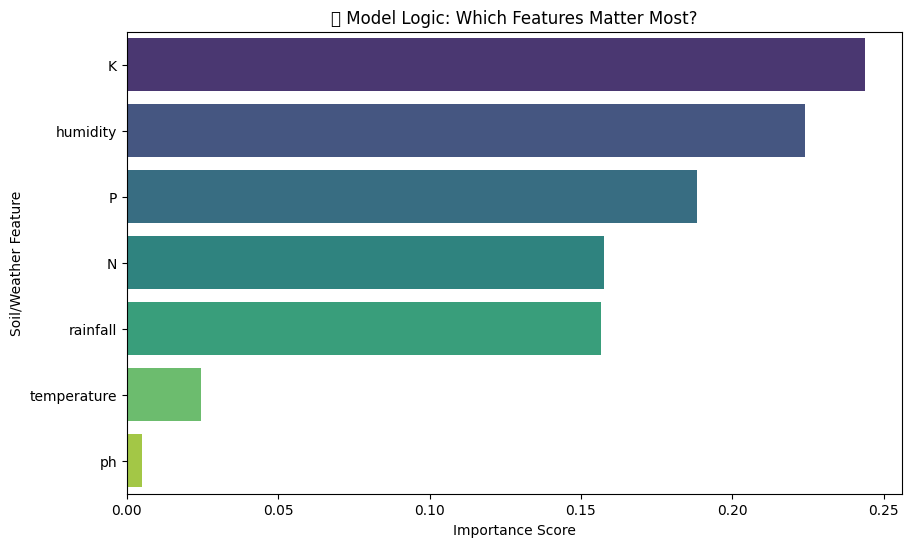

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the mathematical importance of each feature
importances = dt_model.feature_importances_
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create a DataFrame for plotting
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
plt.title("🔍 Model Logic: Which Features Matter Most?")
plt.xlabel("Importance Score")
plt.ylabel("Soil/Weather Feature")
plt.show()

3. The Robustness Test (Noise Injection)

In [16]:
import numpy as np

def stress_test_with_noise(N, P, K, temp, hum, ph, rain, noise_level=5.0):
    """
    Adds random noise (+/- 5 units) to inputs to see if prediction flips.
    """
    # Base prediction
    base_pred = recommend_crop(N, P, K, temp, hum, ph, rain)
    print(f"Original Prediction: {base_pred.upper()}")

    # Add Noise (Simulating bad sensor data)
    N_noisy = N + np.random.uniform(-noise_level, noise_level)
    rain_noisy = rain + np.random.uniform(-noise_level, noise_level)

    # Noisy prediction
    noisy_pred = recommend_crop(N_noisy, P, K, temp, hum, ph, rain_noisy)
    print(f"With Noise (N={N_noisy:.1f}, Rain={rain_noisy:.1f}): {noisy_pred.upper()}")

    if base_pred == noisy_pred:
        print("✅ Result: STABLE (Model ignored the noise)")
    else:
        print("⚠️ Result: UNSTABLE (Prediction flipped)")

# Run the Noise Test
print("\n--- 🌪️ Sensor Noise Robustness Test ---")
stress_test_with_noise(90, 42, 43, 20, 82, 6, 200) # Testing Rice


--- 🌪️ Sensor Noise Robustness Test ---
Original Prediction: RICE
With Noise (N=88.9, Rain=201.9): RICE
✅ Result: STABLE (Model ignored the noise)


The "Baseline" Test (Scientific Comparison)

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

print("--- 📉 Baseline Comparison Test ---")

# 1. Create a "Dumb" Model that just guesses the most common crop
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# 2. Calculate scores
dummy_acc = accuracy_score(y_test, dummy_pred)
my_model_acc = accuracy_score(y_test, y_pred) # Assuming y_pred is from your Decision Tree

print(f"Dummy Model Accuracy (Guessing): {dummy_acc*100:.2f}%")
print(f"Your Model Accuracy (AI):        {my_model_acc*100:.2f}%")

if my_model_acc > dummy_acc + 0.5:
    print("✅ Conclusion: Your model is SIGNIFICANTLY intelligent.")
else:
    print("⚠️ Conclusion: Model is not learning well.")

--- 📉 Baseline Comparison Test ---
Dummy Model Accuracy (Guessing): 2.50%
Your Model Accuracy (AI):        97.95%
✅ Conclusion: Your model is SIGNIFICANTLY intelligent.


The Learning Curve (Data Efficiency)

--- 📈 Generating Learning Curve ---


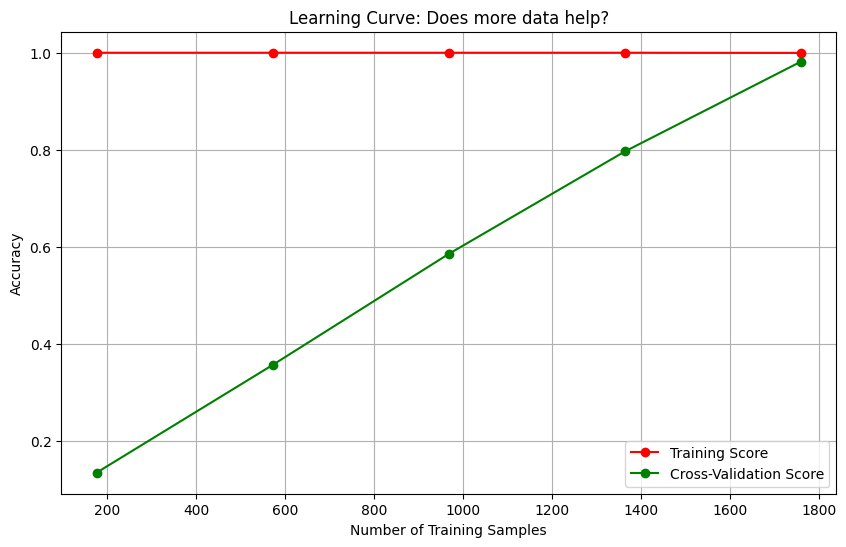

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

print("--- 📈 Generating Learning Curve ---")

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5) # Test at 10%, 30%, 50%, etc.
)

# Calculate averages
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

plt.title("Learning Curve: Does more data help?")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()
#